In [13]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_style("darkgrid")
from sklearn import linear_model
import random

import warnings
warnings.filterwarnings('ignore')

In [18]:
# Levanto los datos

df = pd.read_csv('datos.csv')

In [19]:
print("Decripción de los datos")
print(df.describe())

print("\nLas primeras 8 filas de los datos")
print(df.head(8))

Decripción de los datos
               x          y
count  60.000000  60.000000
mean   29.500000  28.975082
std    17.464249  13.771049
min     0.000000 -16.997848
25%    14.750000  23.874282
50%    29.500000  28.227643
75%    44.250000  33.404901
max    59.000000  73.866501

Las primeras 8 filas de los datos
   x          y
0  0  19.184917
1  1  24.238282
2  2  25.516969
3  3  21.132415
4  4  18.515618
5  5  16.674168
6  6  21.679375
7  7  73.866501


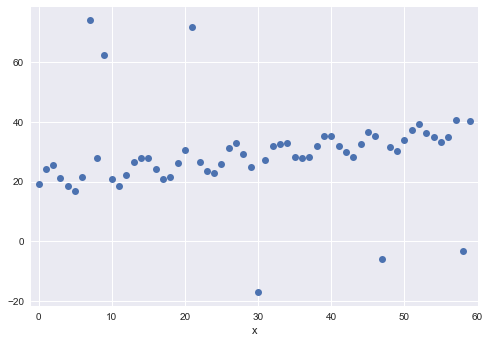

In [20]:
# Gráficos los datos

ax = sns.tsplot(time=df['x'], data=df['y'], interpolate=False)
sns.plt.show()

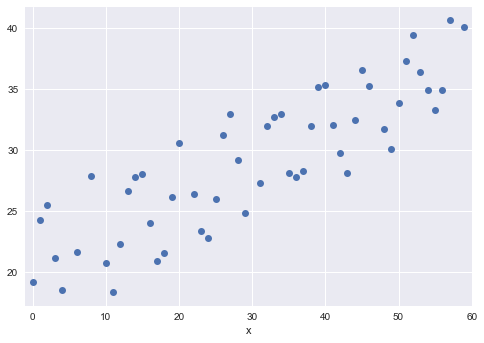

In [22]:
# Limpio los outliers

def mascara_outliers(s):
    return abs(s - s.mean()) <= 2*s.std()
    
mascara = mascara_outliers(df['y'])
df = df[mascara]
sns.tsplot(time=df['x'], data=df['y'], interpolate=False)
sns.plt.show()

Error de predicción: 9.94
Error de predicción: 15.91
Error de predicción: 22.06


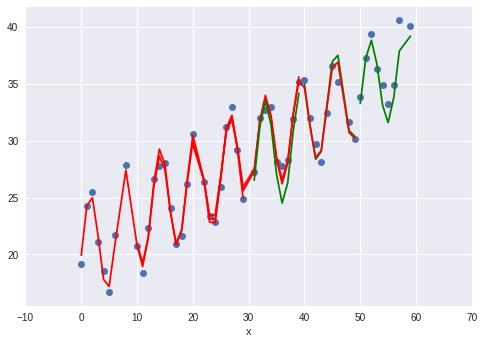

In [11]:
# Uso cuadrados mínimos para predecir

sns.tsplot(time=df['x'], data=df['y'], interpolate=False)

def armar_matriz_A(s):
    temp = []
    for t in s:
        temp.append([t**2, np.sin(t), t, 1])
    return np.array(temp)

def entrenar_y_predecir_en_rangos(df, rango_entrenamiento, rango_prediccion):
    regr = linear_model.LinearRegression(fit_intercept=False)

    # Entreno el modelo
    df_e = df[df['x'].isin(rango_entrenamiento)]
    A_e = armar_matriz_A(df_e['x'])
    regr.fit(A_e, df_e['y'])

    # Me fijo la aproximación que se realizó
    df_e['p'] = regr.predict(A_e)
    sns.tsplot(time=df_e['x'], data=df_e['p'], color='r')

    # Realizo predicciones
    df_p = df[df['x'].isin(rango_prediccion)]

    A_p = armar_matriz_A(df_p['x'])
    df_p['p'] = regr.predict(A_p)
    sns.tsplot(time=df_p['x'], data=df_p['p'], color='g')

    ECM = sum((df_p['p']-df_p['y'])**2)
    return ECM

def predecir(k):
    return entrenar_y_predecir_en_rangos(df, range(k-30,k), range(k,k+10))
    
ECM = predecir(40)
print("Error de predicción: {:.2f}".format(ECM))
ECM = predecir(50)
print("Error de predicción: {:.2f}".format(ECM))
ECM = predecir(30)
print("Error de predicción: {:.2f}".format(ECM))
    
sns.plt.xlim((-10,70))
sns.plt.show()












# Y si no es una seria de tiempo? 

In [12]:
# Un par de cosas más de pandas

years = [2004]*6 + [2005]*6 + [2006]*6
delays = list(np.random.randn(6)+80) + list(np.random.randn(6)+5) + list(np.random.randn(6)+50)
delays[2] = 5
delays[7] = 80

df1 = pd.DataFrame({
    'year': years,
    'delay': delays
})

df1

,delay,year
0,80.821911,2004
1,81.994264,2004
2,5.000000,2004
3,77.742141,2004
4,80.080482,2004
5,80.356484,2004
6,4.082986,2005
7,80.000000,2005
8,5.537343,2005
9,5.836535,2005


In [13]:
# Groupby y sacar outliers

mascara = df1.groupby('year')['delay'].apply(mascara_outliers)
df1 = df1[mascara]
df1

,delay,year
0,80.821911,2004
1,81.994264,2004
3,77.742141,2004
4,80.080482,2004
5,80.356484,2004
6,4.082986,2005
8,5.537343,2005
9,5.836535,2005
10,5.402303,2005
11,5.086106,2005


In [14]:
# Groupby y calcular promedio

promedio = df1.groupby('year').aggregate(['mean', 'std', 'count'])
promedio

delay                
           mean       std count
year                           
2004  80.199056  1.556117     5
2005   5.189055  0.674536     5
2006  50.300613  0.755552     6